<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
        Project - 3rd Phase
        <br />
        Image Colorization using Autoencoder
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99109166
            <br />
            Name = Arman   
            <br />
            Last_Name = Lotfalikhani 
        </div>
        <div class="column">
        <br />
            student_number = 99106599
            <br />
            Name = Sepehr   
            <br />
            Last_Name = Kazemi Ranjbar 
        </div>
    </font>
    </div>


1. Download the "landscape image colorization" dataset and slice it to `train_set`, `validation_set` and `test_set`.
2. Design and train an AutoEncoder using `PyTorch` (not `TensorFlow`) on the dataset to colorize grayscale images
3. plot learning curve and visualize grayscale images of test set, their corresponding color images and their colorized versions side by side.

# Import Necessary Libraries

In [1]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

# Load Dataset and Prepare It

In [2]:
import os
import pandas as pd
from torchvision.io import read_image

color_dir='archive_3\landscape Images\color'
gray_dir='archive_3\landscape Images\gray'
color_t = transforms.Compose([
    transforms.Resize([150, 150])
])
gray_t = transforms.Compose([
    transforms.Resize([150, 150])
])
labels=np.arange(0,7128)
p=[str(i)+'.jpg' for i in range(0,7128)]

class LandscapeDataset():
    def __init__(self, img_dir, gray_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.img_labels = labels
        self.img_paths= p
        self.gray_dir=gray_dir

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_paths[idx])
        gray_path = os.path.join(self.gray_dir, self.img_paths[idx])
        image = read_image(img_path).float()
        gray=read_image(gray_path).float()
        if self.transform:
            image = self.transform(image)/255
        if self.target_transform:
            gray = self.target_transform(gray)/255
        return image,gray
    
dataset=LandscapeDataset(img_dir=color_dir,gray_dir=gray_dir,transform=color_t,target_transform=gray_t)

In [3]:
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [6000, 700, 428])
train_loader = DataLoader(train_set, 10, shuffle=True)
val_loader = DataLoader(val_set, 10, shuffle=True)
test_loader = DataLoader(test_set, 10, shuffle=True)

# Define Your Model

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder=nn.Sequential(
            nn.Conv2d(1,30,kernel_size=6,stride=4),#40 times 37*37
            nn.ReLU(),
            nn.Conv2d(30,20,kernel_size=3,stride=2),#20 times 18*18
            nn.ReLU(),
            nn.Conv2d(20,40,kernel_size=2,stride=2)#40 
        )
        self.decoder=nn.Sequential(
            nn.ConvTranspose2d(40,20,2,stride=2),#20 times 6*6
            nn.ReLU(),
            nn.ConvTranspose2d(20,30,kernel_size=3,stride=2),#30 times 6*6
            nn.ReLU(),
            nn.ConvTranspose2d(30,3,kernel_size=6,stride=4),#40 parameters in the end
            nn.Sigmoid()
        )
        ## FILL HERE

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
net=Net()

# Fit The Model

Also Define optimizer, Criterion and other parameters 

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch: 0 Running loss: 0.028826
Epoch: 0 Validation Running loss: 0.116867
Epoch: 1 Running loss: 0.022864
Epoch: 1 Validation Running loss: 0.130132
Epoch: 2 Running loss: 0.021397
Epoch: 2 Validation Running loss: 0.111052
Epoch: 3 Running loss: 0.020388
Epoch: 3 Validation Running loss: 0.125520
Epoch: 4 Running loss: 0.019700
Epoch: 4 Validation Running loss: 0.132317
Epoch: 5 Running loss: 0.019135
Epoch: 5 Validation Running loss: 0.139159
Epoch: 6 Running loss: 0.018486
Epoch: 6 Validation Running loss: 0.131005
Epoch: 7 Running loss: 0.017769
Epoch: 7 Validation Running loss: 0.113820
Epoch: 8 Running loss: 0.017403
Epoch: 8 Validation Running loss: 0.120799
Epoch: 9 Running loss: 0.016966
Epoch: 9 Validation Running loss: 0.116549
Epoch: 10 Running loss: 0.016639
Epoch: 10 Validation Running loss: 0.116307
Epoch: 11 Running loss: 0.016497
Epoch: 11 Validation Running loss: 0.124780
Epoch: 12 Running loss: 0.016382
Epoch: 12 Validation Running loss: 0.122829
Epoch: 13 Running l

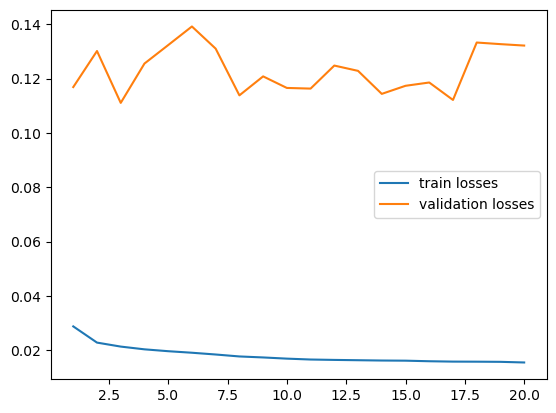

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_func=nn.MSELoss()
gpu_net=net.to(device)
optimizer=torch.optim.Adam(gpu_net.parameters())

epoch_nums = 20## Number of epochs
train_losses=np.zeros(epoch_nums)
val_losses=np.zeros(epoch_nums)
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    val_running_loss=0.0
    for i, data in enumerate(train_loader, 0):
        images=data[0].to(device)
        grayscale=data[1].to(device)
        #print(i)
        #print(images.size())
        #print(grayscale.size())
        reconstructed=gpu_net(grayscale)
        #print(reconstructed.size())
        loss=loss_func(images,reconstructed)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        running_loss=running_loss+loss.item()/len(train_loader)
        train_losses[epoch]=running_loss
    print("Epoch: %i Running loss: %f"%(epoch,running_loss))
    
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            images=data[0].to(device)
            grayscale=data[1].to(device)
            denoised=gpu_net(grayscale)
            v_loss=loss_func(images,reconstructed)
            val_running_loss=val_running_loss+v_loss.item()/len(val_loader)
            val_losses[epoch]=val_running_loss
        print("Epoch: %i Validation Running loss: %f"%(epoch,val_running_loss))

print('Finished Training')
plt.plot(np.arange(1,21),train_losses,label='train losses')
plt.plot(np.arange(1,21),val_losses,label='validation losses')
plt.legend()
plt.show()

We see that after 10 epochs, we do not get a substantially lower loss and after epoch 18, we observe overfitting.
So we retrain the model with 10 epochs (code is copied from above)

In [8]:
net2=Net()
gpu_net2=net2.to(device)
optimizer2=torch.optim.Adam(gpu_net2.parameters())
loss_func2=nn.MSELoss()
epoch_nums2 = 10## Number of epochs
for epoch in range(epoch_nums2):  # loop over the dataset multiple times

    running_loss = 0.0
    val_running_loss=0.0
    for i, data in enumerate(train_loader, 0):
        images=data[0].to(device)
        grayscale=data[1].to(device)
        reconstructed=gpu_net2(grayscale)
        loss2=loss_func2(images,reconstructed)
        
        loss2.backward()
        optimizer2.step()
        optimizer2.zero_grad()
        
        running_loss=running_loss+loss.item()/len(train_loader)
        train_losses[epoch]=running_loss
    print("Epoch: %i Running loss: %f"%(epoch,running_loss))
    
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            images=data[0].to(device)
            grayscale=data[1].to(device)
            denoised=gpu_net2(grayscale)
            v_loss=loss_func2(images,reconstructed)
            val_running_loss=val_running_loss+v_loss.item()/len(val_loader)
        print("Epoch: %i Validation Running loss: %f"%(epoch,val_running_loss))
    

print('Finished Training')

Epoch: 0 Running loss: 0.012444
Epoch: 0 Validation Running loss: 0.123599
Epoch: 1 Running loss: 0.012444
Epoch: 1 Validation Running loss: 0.118402
Epoch: 2 Running loss: 0.012444
Epoch: 2 Validation Running loss: 0.134705
Epoch: 3 Running loss: 0.012444
Epoch: 3 Validation Running loss: 0.115365
Epoch: 4 Running loss: 0.012444
Epoch: 4 Validation Running loss: 0.119938
Epoch: 5 Running loss: 0.012444
Epoch: 5 Validation Running loss: 0.105758
Epoch: 6 Running loss: 0.012444
Epoch: 6 Validation Running loss: 0.119422
Epoch: 7 Running loss: 0.012444
Epoch: 7 Validation Running loss: 0.123417
Epoch: 8 Running loss: 0.012444
Epoch: 8 Validation Running loss: 0.118445
Epoch: 9 Running loss: 0.012444
Epoch: 9 Validation Running loss: 0.124968
Finished Training


# Plot The Results

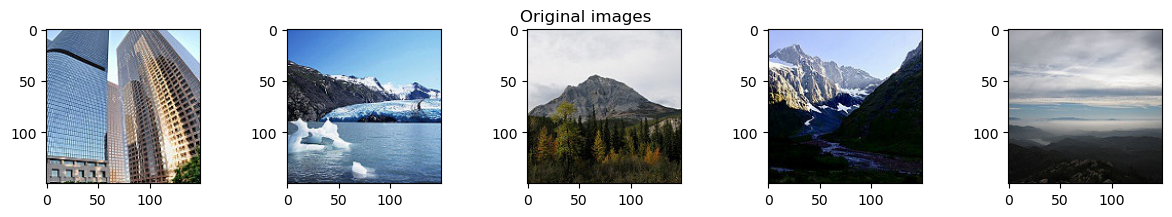

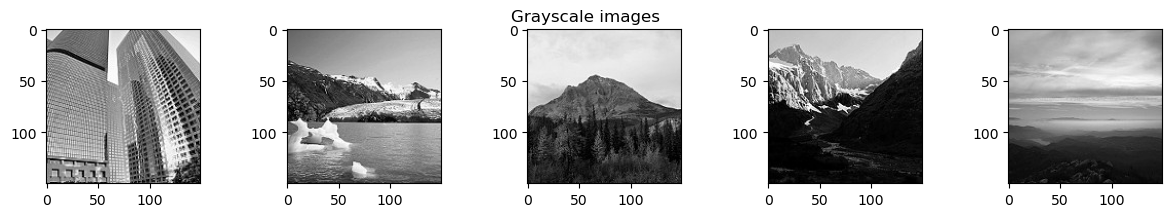

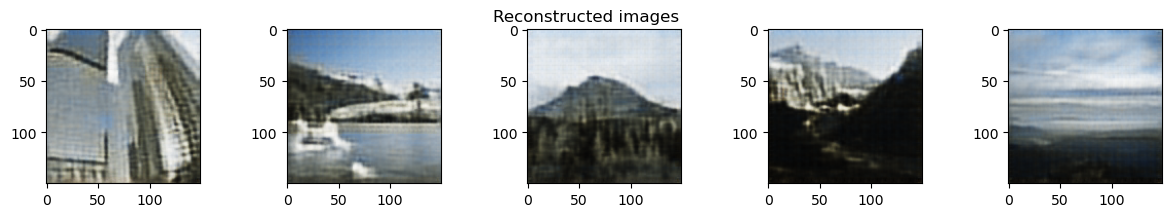

In [6]:
def clone_for_plot(image):
    clone=image.clone()
    clone=clone.transpose(2,0)
    clone=clone.transpose(1,0)
    return clone

fig2,axs2=plt.subplots(1,5,figsize=(15,2))
fig6,axs6=plt.subplots(1,5,figsize=(15,2))
fig7,axs7=plt.subplots(1,5,figsize=(15,2))
rng=np.random.default_rng()
sigma=0.1
for i in range(5):
    index = rng.integers(len(test_set))
    image, gray = test_set[index]

    image=image.to(device)
    gray=gray.to(device)
    
    reconstructed=gpu_net(gray)  
    clone=clone_for_plot(image.cpu())
    axs2[i].imshow(clone)
    clone=clone_for_plot(gray.cpu())
    axs6[i].imshow(clone.detach().numpy(),cmap='gray')
    clone=clone_for_plot(reconstructed.cpu())
    axs7[i].imshow(clone.detach().numpy())
fig2.suptitle('Original images')
fig6.suptitle('Grayscale images')
fig7.suptitle('Reconstructed images')
plt.show()


Results with the second model (with 10 epochs):

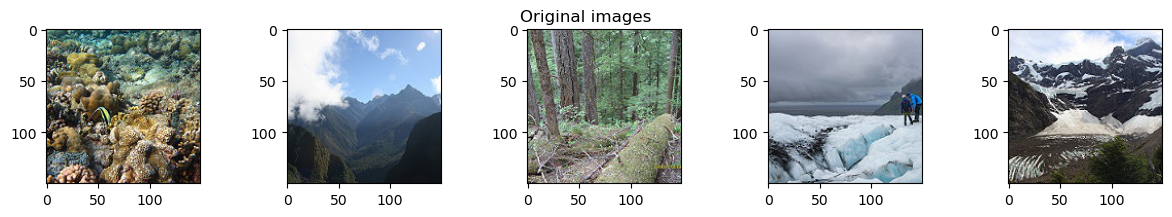

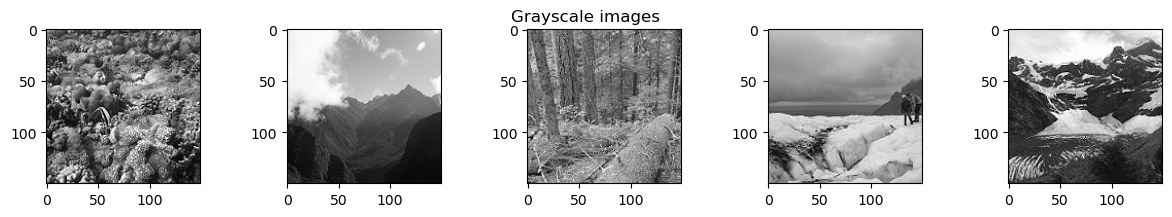

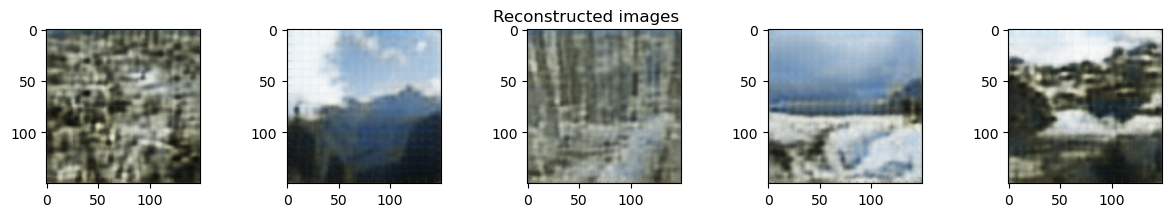

In [9]:
fig3,axs3=plt.subplots(1,5,figsize=(15,2))
fig4,axs4=plt.subplots(1,5,figsize=(15,2))
fig5,axs5=plt.subplots(1,5,figsize=(15,2))
rng=np.random.default_rng()
sigma=0.1
for i in range(5):
    index = rng.integers(len(test_set))
    image, gray = test_set[index]

    image=image.to(device)
    gray=gray.to(device)
    
    reconstructed=gpu_net2(gray)  
    clone=clone_for_plot(image.cpu())
    axs3[i].imshow(clone)
    clone=clone_for_plot(gray.cpu())
    axs4[i].imshow(clone.detach().numpy(),cmap='gray')
    clone=clone_for_plot(reconstructed.cpu())
    axs5[i].imshow(clone.detach().numpy())
fig3.suptitle('Original images')
fig4.suptitle('Grayscale images')
fig5.suptitle('Reconstructed images')
plt.show()